# TASK #1. LOAD TEXT DATA AND PERFORM BASIC DATA EXPLORATION

In [12]:
# Import Pandas for data manipulation using dataframes
# Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from google.colab import files
files.upload()

Saving text_data.csv to text_data (1).csv


{'text_data.csv': b'rating,date,variation,verified_reviews,feedback\r\n5,31-Jul-18,Charcoal Fabric ,Love my Echo!,1\r\n5,31-Jul-18,Charcoal Fabric ,Loved it!,1\r\n4,31-Jul-18,Walnut Finish ,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.",1\r\n5,31-Jul-18,Charcoal Fabric ,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1\r\n5,31-Jul-18,Charcoal Fabric ,Music,1\r\n5,31-Jul-18,Heather Gray Fabric ,"I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can\xe2\x80\x99t wait to see what else it can do.",1\r\n3,31-Jul-18,Sandstone Fabric ,"Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of an

In [14]:
# import the data using read_csv
df = pd.read_csv('text_data.csv')
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [15]:
# Show the first couple of rows in the data
df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [16]:
# Show the last couple of rows in the data
df.tail(10)

,rating,date,variation,verified_reviews,feedback
3140,4,30-Jul-18,White Dot,Barry,1
3141,3,30-Jul-18,Black Dot,,1
3142,4,30-Jul-18,White Dot,My three year old loves it. Good for doing ba...,1
3143,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,1
3144,5,30-Jul-18,Black Dot,love it,1
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


# TASK 2. UPPER AND LOWER OPERATIONS

In [17]:
# Check out the verified_reviews column (Text data)
# Now we can convert all the words into upper case or lower case
df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [18]:
# You can convert all words in a given column into upper case by applying str.upper()
df['verified_reviews'].str.upper()

0                                           LOVE MY ECHO!
1                                               LOVED IT!
2       SOMETIMES WHILE PLAYING A GAME, YOU CAN ANSWER...
3       I HAVE HAD A LOT OF FUN WITH THIS THING. MY 4 ...
4                                                   MUSIC
                              ...                        
3145    PERFECT FOR KIDS, ADULTS AND EVERYONE IN BETWE...
3146    LISTENING TO MUSIC, SEARCHING LOCATIONS, CHECK...
3147    I DO LOVE THESE THINGS, I HAVE THEM RUNNING MY...
3148    ONLY COMPLAINT I HAVE IS THAT THE SOUND QUALIT...
3149                                                 GOOD
Name: verified_reviews, Length: 3150, dtype: object

In [19]:
# You can convert all words in a given column into lower case by applying str.upper()
df['verified_reviews'].str.lower()

0                                           love my echo!
1                                               loved it!
2       sometimes while playing a game, you can answer...
3       i have had a lot of fun with this thing. my 4 ...
4                                                   music
                              ...                        
3145    perfect for kids, adults and everyone in betwe...
3146    listening to music, searching locations, check...
3147    i do love these things, i have them running my...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

In [20]:
# You can also convert the headernames into upper case
df.columns = df.columns.str.upper()
df

,RATING,DATE,VARIATION,VERIFIED_REVIEWS,FEEDBACK
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [21]:
# Let's convert them back to lowercase!
df.columns = df.columns.str.lower()
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


# TASK #3: FILTER OUT POSITIVE AND NEGATIVE RATINGS 

In [22]:
negative_df = df[df['feedback'] == 0]
negative_df

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


In [23]:
positive_df = df[df['feedback'] == 1]
positive_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


# TASK 4. PERFORM PANDAS OPERATIONS PART #1

In [24]:
# obtain the length of a given string (how many characters per string)
df['reviews_length'] = df['verified_reviews'].str.len()
df

,rating,date,variation,verified_reviews,feedback,reviews_length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [25]:
# Let's obtain the shortest review
min_char = df['reviews_length'].min()
min_char

1

In [26]:
# Let's obtain the longest review
max_char = df['reviews_length'].max()
max_char

2851

In [27]:
# Let's filter out the shortest reviews
df[df['reviews_length'] == min_char]

,rating,date,variation,verified_reviews,feedback,reviews_length
60,5,30-Jul-18,Heather Gray Fabric,😍,1,1
85,5,30-Jul-18,Heather Gray Fabric,,1,1
183,3,29-Jul-18,Heather Gray Fabric,,1,1
219,5,29-Jul-18,Sandstone Fabric,,1,1
374,1,26-Jul-18,Black,,0,1
...,...,...,...,...,...,...
3114,3,30-Jul-18,Black Dot,,1,1
3120,5,30-Jul-18,Black Dot,,1,1
3123,4,30-Jul-18,Black Dot,,1,1
3126,5,30-Jul-18,Black Dot,,1,1


# TASK 5. PERFORM PANDAS OPERATIONS PART #2

In [28]:
# You can replace elements in a dataframe as follows:
df['variation'] = df['variation'].str.replace('Walnut Finish', 'Walnut Finish (Best Seller)')
df

,rating,date,variation,verified_reviews,feedback,reviews_length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish (Best Seller),"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [29]:
# Filter the DataFrame by selecting rows that only ends with the word "love"
# Note that we had to convert all words into lower case first 
mask = df['verified_reviews'].str.lower().str.endswith('love')
df[mask]

,rating,date,variation,verified_reviews,feedback,reviews_length
438,5,7-Jul-18,Black,Love,1,4
2018,5,19-Jul-18,Black Plus,"Love, Love, Love",1,16


In [30]:
# Filter the DataFrame by selecting rows that only starts with the word "love"
# Note that we had to convert all words into lower case first 
mask = df['verified_reviews'].str.lower().str.startswith('love')
df[mask]

,rating,date,variation,verified_reviews,feedback,reviews_length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,114
13,5,30-Jul-18,Charcoal Fabric,"Love, Love, Love!!",1,18
20,5,30-Jul-18,Charcoal Fabric,Love the Echo and how good the music sounds pl...,1,246
...,...,...,...,...,...,...
3089,5,30-Jul-18,Black Dot,Love Alexa!! I own 2 and gave one for a gift ...,1,67
3110,5,30-Jul-18,White Dot,"Love it! I personally prefer Spotify music, so...",1,401
3111,5,30-Jul-18,Black Dot,Love it. It works great. Alexa still has som...,1,174
3124,5,30-Jul-18,Black Dot,Love my Alexa! Actually have 3 throughout the ...,1,128


In [31]:
# you can split the string into a list 
df['verified_reviews'].str.split(' ')

0                                       [Love, my, Echo!]
1                                            [Loved, it!]
2       [Sometimes, while, playing, a, game,, you, can...
3       [I, have, had, a, lot, of, fun, with, this, th...
4                                                 [Music]
                              ...                        
3145    [Perfect, for, kids,, adults, and, everyone, i...
3146    [Listening, to, music,, searching, locations,,...
3147    [I, do, love, these, things,, i, have, them, r...
3148    [Only, complaint, I, have, is, that, the, soun...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object

In [32]:
# you can also select the index within the extracted list as follows
# Note that index 0 indicates the first element in a given list
df['verified_reviews'].str.split(' ').str.get(0)

0            Love
1           Loved
2       Sometimes
3               I
4           Music
          ...    
3145      Perfect
3146    Listening
3147            I
3148         Only
3149         Good
Name: verified_reviews, Length: 3150, dtype: object

# TASK 6. PERFORM TEXT DATA CLEANING BY REMOVING PUNCTUATIONS

In [33]:
# String module is super useful when dealing with text data
# String contains constants and classes for working with text
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
Test = '$I love Pandas &Data Analytics!!'
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I love Pandas Data Analytics'

In [35]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['I',
 ' ',
 'l',
 'o',
 'v',
 'e',
 ' ',
 'P',
 'a',
 'n',
 'd',
 'a',
 's',
 ' ',
 'D',
 'a',
 't',
 'a',
 ' ',
 'A',
 'n',
 'a',
 'l',
 'y',
 't',
 'i',
 'c',
 's']

In [36]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I love Pandas Data Analytics'

In [37]:
# Let's define a function to remove punctuations
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    return Test_punc_removed_join

In [38]:
# Let's remove punctuations from our dataset 
df['verified_reviews_nopunc'] = df['verified_reviews'].apply(remove_punc)

In [39]:
df

,rating,date,variation,verified_reviews,feedback,reviews_length,verified_reviews_nopunc
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,Love my Echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,Loved it
2,4,31-Jul-18,Walnut Finish (Best Seller),"Sometimes while playing a game, you can answer...",1,195,Sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,I have had a lot of fun with this thing My 4 y...
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,Music
...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,Perfect for kids adults and everyone in between
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135,Listening to music searching locations checkin...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441,I do love these things i have them running my ...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380,Only complaint I have is that the sound qualit...


# TASK 7. PERFORM TEXT DATA CLEANING BY REMOVING STOPWORDS

In [40]:
!pip install gensim

In [41]:
!pip install nltk

In [42]:
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess


In [43]:
# download stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
# Add more stopwords by using extend
stop_words = stopwords.words('english')
stop_words.extend(['Amazon', 'amazon', 'alexa', 'echo', 'Alexa','device', 'Dot', 'dot'])


In [45]:
# Simple_preprocess converts a string into a series of lowered case tokens
# Let's try it on a sample dataset 
gensim.utils.simple_preprocess(df['verified_reviews'][0])

['love', 'my', 'echo']

In [46]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 1 and token not in stop_words:
            result.append(token)
            
    return result

In [47]:
# apply pre-processing to the text column
df['verified_reviews_nopunc_nostopwords'] = df['verified_reviews_nopunc'].apply(preprocess)

In [48]:
df['verified_reviews'][38]

'This thing is way cool!  You should get one.  If you want to be cool, that is.'

In [49]:
df['verified_reviews_nopunc_nostopwords'][38]

['thing', 'way', 'cool', 'get', 'one', 'want', 'cool']

In [50]:
df

,rating,date,variation,verified_reviews,feedback,reviews_length,verified_reviews_nopunc,verified_reviews_nopunc_nostopwords
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,Love my Echo,[love]
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,Loved it,[loved]
2,4,31-Jul-18,Walnut Finish (Best Seller),"Sometimes while playing a game, you can answer...",1,195,Sometimes while playing a game you can answer ...,"[sometimes, playing, game, answer, question, c..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,I have had a lot of fun with this thing My 4 y...,"[lot, fun, thing, yr, old, learns, dinosaurs, ..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,Music,[music]
...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,Perfect for kids adults and everyone in between,"[perfect, kids, adults, everyone]"
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135,Listening to music searching locations checkin...,"[listening, music, searching, locations, check..."
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441,I do love these things i have them running my ...,"[love, things, running, entire, home, tv, ligh..."
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380,Only complaint I have is that the sound qualit...,"[complaint, sound, quality, isnt, great, mostl..."


In [51]:
# join the words into a string
df['verified_reviews_nopunc_nostopwords_ioined'] = df['verified_reviews_nopunc_nostopwords'].apply(lambda x: " ".join(x))

In [52]:
df

,rating,date,variation,verified_reviews,feedback,reviews_length,verified_reviews_nopunc,verified_reviews_nopunc_nostopwords,verified_reviews_nopunc_nostopwords_ioined
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,Love my Echo,[love],love
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,Loved it,[loved],loved
2,4,31-Jul-18,Walnut Finish (Best Seller),"Sometimes while playing a game, you can answer...",1,195,Sometimes while playing a game you can answer ...,"[sometimes, playing, game, answer, question, c...",sometimes playing game answer question correct...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,I have had a lot of fun with this thing My 4 y...,"[lot, fun, thing, yr, old, learns, dinosaurs, ...",lot fun thing yr old learns dinosaurs control ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,Music,[music],music
...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,Perfect for kids adults and everyone in between,"[perfect, kids, adults, everyone]",perfect kids adults everyone
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135,Listening to music searching locations checkin...,"[listening, music, searching, locations, check...",listening music searching locations checking t...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441,I do love these things i have them running my ...,"[love, things, running, entire, home, tv, ligh...",love things running entire home tv lights ther...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380,Only complaint I have is that the sound qualit...,"[complaint, sound, quality, isnt, great, mostl...",complaint sound quality isnt great mostly use ...


# TASK 8. TEXT DATA VISUALIZATION

In [53]:
df

,rating,date,variation,verified_reviews,feedback,reviews_length,verified_reviews_nopunc,verified_reviews_nopunc_nostopwords,verified_reviews_nopunc_nostopwords_ioined
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,Love my Echo,[love],love
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,Loved it,[loved],loved
2,4,31-Jul-18,Walnut Finish (Best Seller),"Sometimes while playing a game, you can answer...",1,195,Sometimes while playing a game you can answer ...,"[sometimes, playing, game, answer, question, c...",sometimes playing game answer question correct...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,I have had a lot of fun with this thing My 4 y...,"[lot, fun, thing, yr, old, learns, dinosaurs, ...",lot fun thing yr old learns dinosaurs control ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,Music,[music],music
...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,Perfect for kids adults and everyone in between,"[perfect, kids, adults, everyone]",perfect kids adults everyone
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135,Listening to music searching locations checkin...,"[listening, music, searching, locations, check...",listening music searching locations checking t...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441,I do love these things i have them running my ...,"[love, things, running, entire, home, tv, ligh...",love things running entire home tv lights ther...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380,Only complaint I have is that the sound qualit...,"[complaint, sound, quality, isnt, great, mostl...",complaint sound quality isnt great mostly use ...


In [54]:
# Let's obtain the number of words in every row in the DataFrame
df['length'] = df['verified_reviews_nopunc_nostopwords'].apply(len)
df.head()

,rating,date,variation,verified_reviews,feedback,reviews_length,verified_reviews_nopunc,verified_reviews_nopunc_nostopwords,verified_reviews_nopunc_nostopwords_ioined,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,Love my Echo,[love],love,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,Loved it,[loved],loved,1
2,4,31-Jul-18,Walnut Finish (Best Seller),"Sometimes while playing a game, you can answer...",1,195,Sometimes while playing a game you can answer ...,"[sometimes, playing, game, answer, question, c...",sometimes playing game answer question correct...,16
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,I have had a lot of fun with this thing My 4 y...,"[lot, fun, thing, yr, old, learns, dinosaurs, ...",lot fun thing yr old learns dinosaurs control ...,18
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,Music,[music],music,1


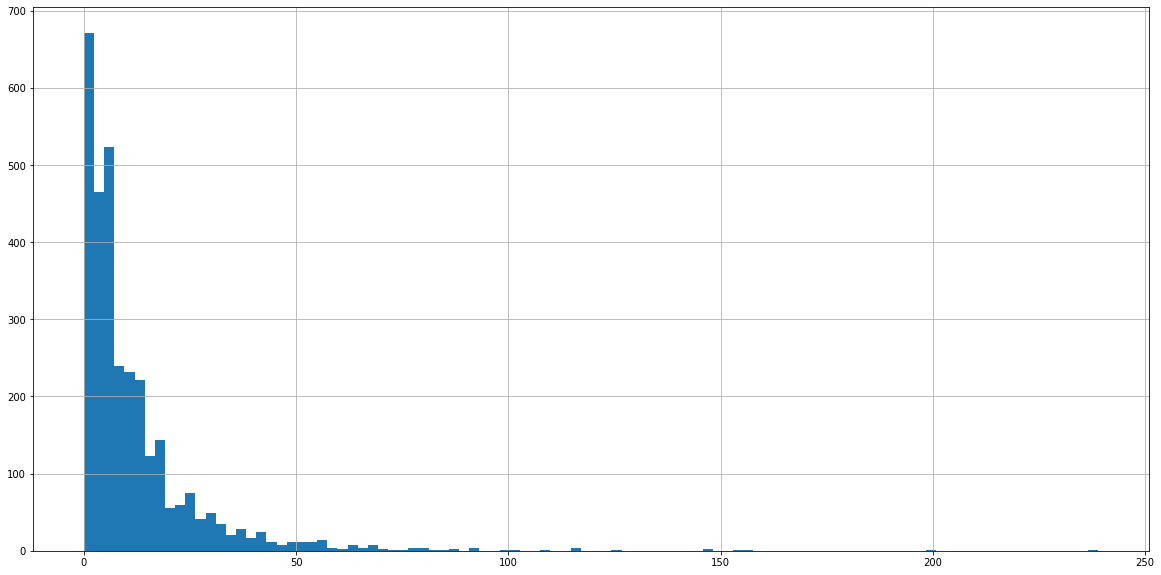

In [55]:
# Let's plot the histogram of the length column
df['length'].hist(bins = 100, figsize = (20, 10));

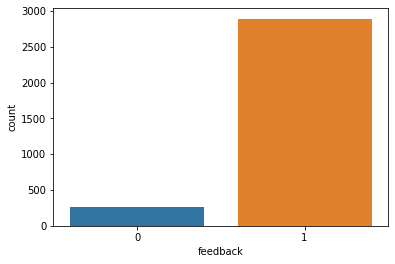

In [56]:
# Use count plot to show how many samples have positive/negative feedback
sns.countplot(x = 'feedback', data = df);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

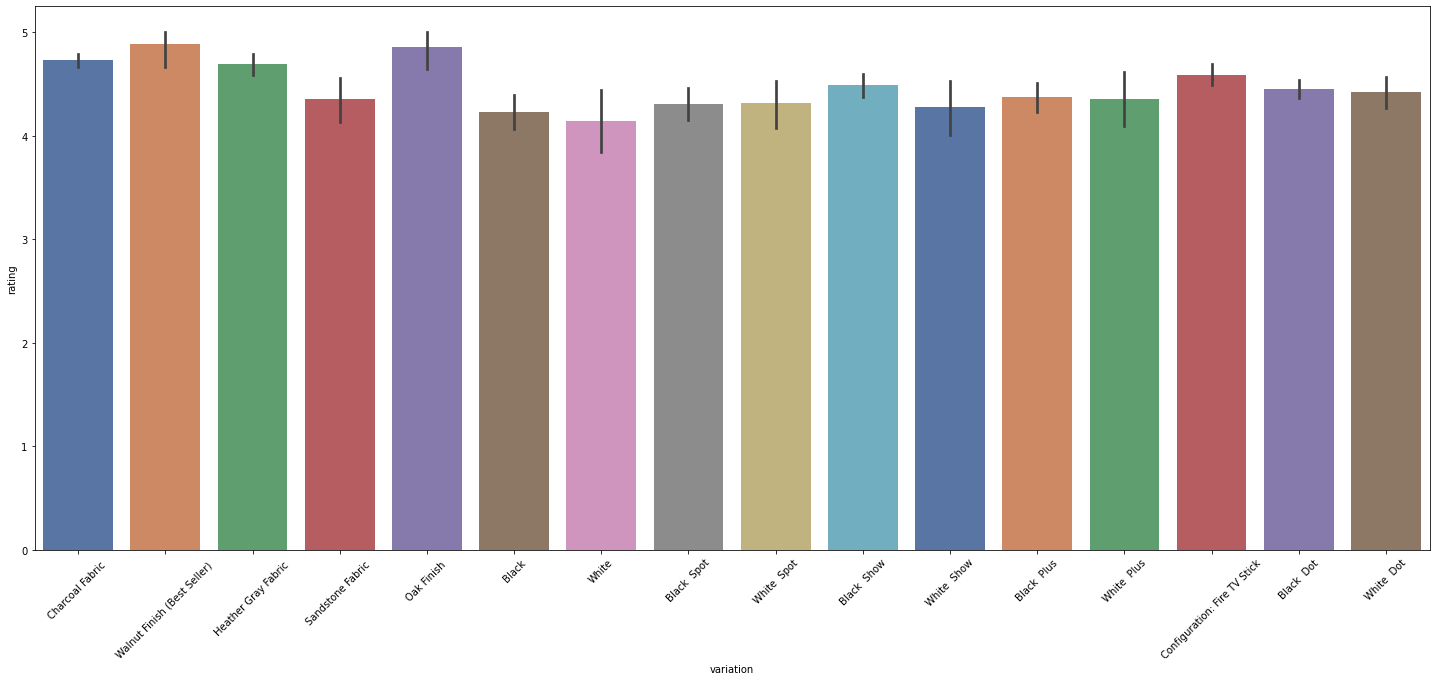

In [57]:
# Use Seaborn barplot to show variations/ratings
plt.figure(figsize = (25,10))
sns.barplot(x = 'variation', y = 'rating', data = df, palette = 'deep')
plt.xticks(rotation = 45)


In [58]:
!pip install wordcloud

In [59]:
df

,rating,date,variation,verified_reviews,feedback,reviews_length,verified_reviews_nopunc,verified_reviews_nopunc_nostopwords,verified_reviews_nopunc_nostopwords_ioined,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,Love my Echo,[love],love,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,Loved it,[loved],loved,1
2,4,31-Jul-18,Walnut Finish (Best Seller),"Sometimes while playing a game, you can answer...",1,195,Sometimes while playing a game you can answer ...,"[sometimes, playing, game, answer, question, c...",sometimes playing game answer question correct...,16
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,I have had a lot of fun with this thing My 4 y...,"[lot, fun, thing, yr, old, learns, dinosaurs, ...",lot fun thing yr old learns dinosaurs control ...,18
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,Music,[music],music,1
...,...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,Perfect for kids adults and everyone in between,"[perfect, kids, adults, everyone]",perfect kids adults everyone,4
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135,Listening to music searching locations checkin...,"[listening, music, searching, locations, check...",listening music searching locations checking t...,13
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441,I do love these things i have them running my ...,"[love, things, running, entire, home, tv, ligh...",love things running entire home tv lights ther...,42
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380,Only complaint I have is that the sound qualit...,"[complaint, sound, quality, isnt, great, mostl...",complaint sound quality isnt great mostly use ...,34


In [60]:
# Take a dataframe column and convert it into a list
sentences = df['verified_reviews_nopunc_nostopwords_ioined'].tolist()
sentences

['love',
 'loved',
 'sometimes playing game answer question correctly says got wrong answers like able turn lights away home',
 'lot fun thing yr old learns dinosaurs control lights play games like categories nice sound playing music well',
 'music',
 'received gift needed another bluetooth something play music easily accessible found smart speaker wait see else',
 'without cellphone cannot use many features ipad see use great alarm almost deaf hear alarm bedroom living room reason enough keep herit fun ask random questions hear response seem smartbon politics yet',
 'think th one ive purchased im working getting one every room house really like features offer specifily playing music echos controlling lights throughout house',
 'looks great',
 'love listened songs heard since childhood get news weather information great',
 'sent year old dad talks constantly',
 'love learning knew things eveyday still figuring everything works far easy use understand make laugh times',
 'purchased moth

In [61]:
len(sentences)

3150

In [62]:
print(sentences)

['love', 'loved', 'sometimes playing game answer question correctly says got wrong answers like able turn lights away home', 'lot fun thing yr old learns dinosaurs control lights play games like categories nice sound playing music well', 'music', 'received gift needed another bluetooth something play music easily accessible found smart speaker wait see else', 'without cellphone cannot use many features ipad see use great alarm almost deaf hear alarm bedroom living room reason enough keep herit fun ask random questions hear response seem smartbon politics yet', 'think th one ive purchased im working getting one every room house really like features offer specifily playing music echos controlling lights throughout house', 'looks great', 'love listened songs heard since childhood get news weather information great', 'sent year old dad talks constantly', 'love learning knew things eveyday still figuring everything works far easy use understand make laugh times', 'purchased mother knee prob

In [63]:
# Join all elements in the list into one massive string!
words_as_one_string =" ".join(sentences)

In [64]:
words_as_one_string

'love loved sometimes playing game answer question correctly says got wrong answers like able turn lights away home lot fun thing yr old learns dinosaurs control lights play games like categories nice sound playing music well music received gift needed another bluetooth something play music easily accessible found smart speaker wait see else without cellphone cannot use many features ipad see use great alarm almost deaf hear alarm bedroom living room reason enough keep herit fun ask random questions hear response seem smartbon politics yet think th one ive purchased im working getting one every room house really like features offer specifily playing music echos controlling lights throughout house looks great love listened songs heard since childhood get news weather information great sent year old dad talks constantly love learning knew things eveyday still figuring everything works far easy use understand make laugh times purchased mother knee problems give something trying come getti

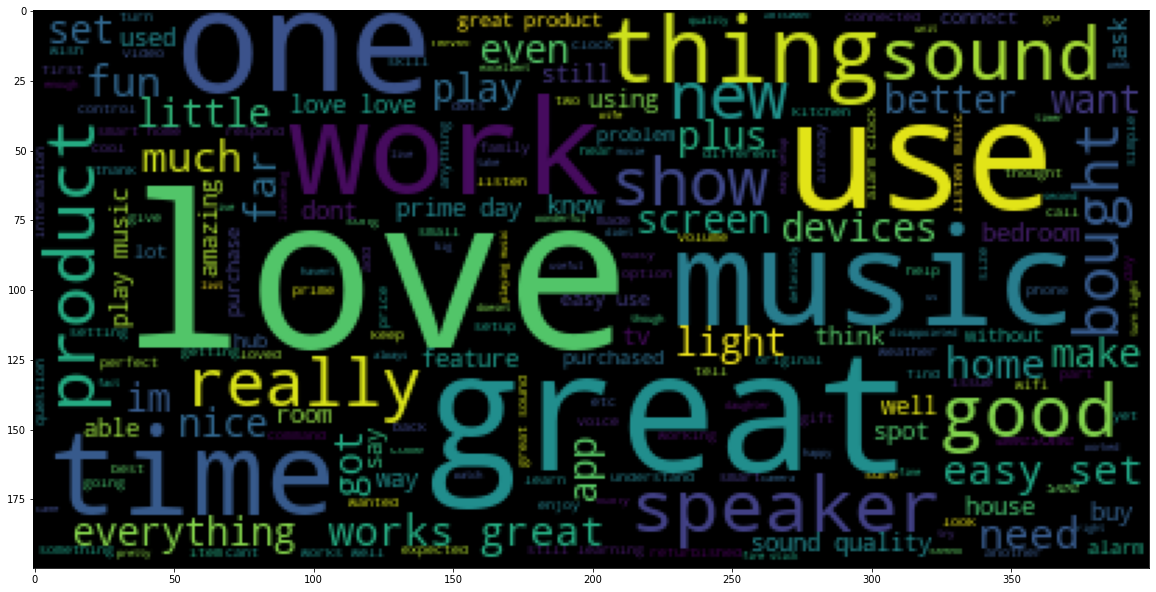

In [65]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(words_as_one_string));

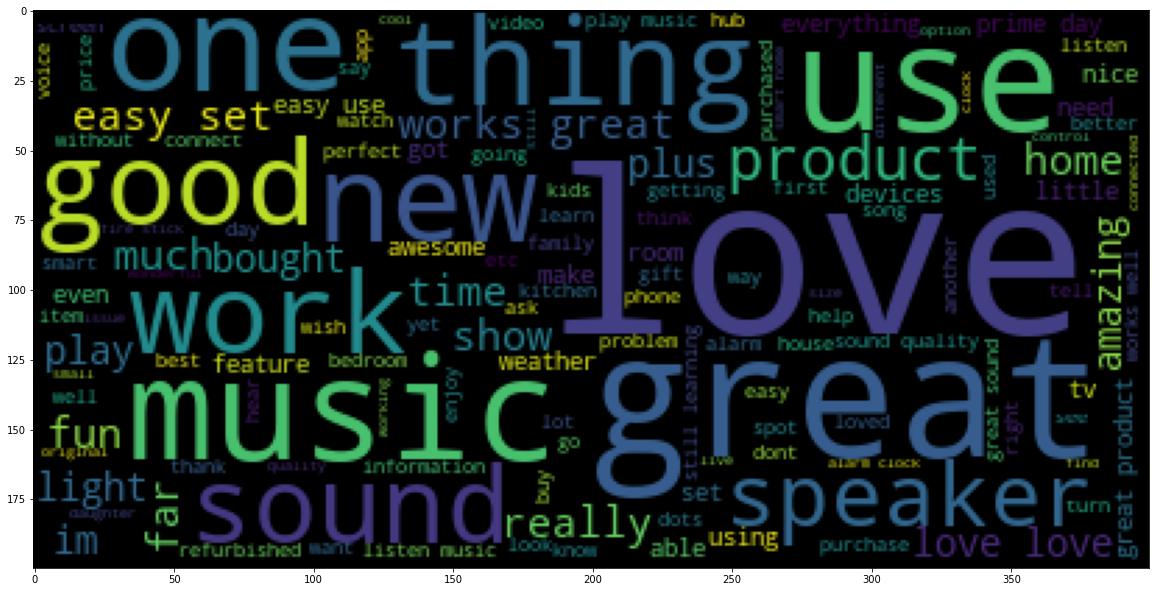

In [66]:
poor_rating_df = df[df['rating'] == 5]
poor_rating_df

sentences = poor_rating_df['verified_reviews_nopunc_nostopwords_ioined'].tolist()
words_as_one_string =" ".join(sentences)
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(words_as_one_string));

# EXCELLENT JOB!!

# MINI CHALLENGES

**MINI CHALLENGE #1:**
- **What is the average rating?** 
- **How many unique classes do we have in the variation column?**

In [67]:
# Obtain statistical information about the dataframe
df.describe()

,rating,feedback,reviews_length,length
count,3150.000000,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524,11.886984
std,1.068506,0.273778,182.099952,15.652058
min,1.000000,0.000000,1.000000,0.000000
25%,4.000000,1.000000,30.000000,3.000000
50%,5.000000,1.000000,74.000000,7.000000
75%,5.000000,1.000000,165.000000,15.000000
max,5.000000,1.000000,2851.000000,239.000000


In [68]:
df["variation"].nunique()

16

**MINI CHALLENGE #2:**
- **Apply a method to return strings where the first character in every word is upper case (external research is required)**

In [69]:
# You can also use title method which returns a string where the first character in every word is upper case
df['verified_reviews'].str.title()	

0                                           Love My Echo!
1                                               Loved It!
2       Sometimes While Playing A Game, You Can Answer...
3       I Have Had A Lot Of Fun With This Thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect For Kids, Adults And Everyone In Betwe...
3146    Listening To Music, Searching Locations, Check...
3147    I Do Love These Things, I Have Them Running My...
3148    Only Complaint I Have Is That The Sound Qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

**MINI CHALLENGE #3:**
- **instead of using feedback, use rating column instead to separate positive and negative reviews. Use extreme rating scores (i.e.: rating = 1 and 5)**

In [70]:
poor_rating_df = df[df['rating'] == 1]
poor_rating_df

,rating,date,variation,verified_reviews,feedback,reviews_length,verified_reviews_nopunc,verified_reviews_nopunc_nostopwords,verified_reviews_nopunc_nostopwords_ioined,length
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18,Not much features,"[much, features]",much features,2
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87,Stopped working after 2 weeks didnt follow com...,"[stopped, working, weeks, didnt, follow, comma...",stopped working weeks didnt follow commands re...,9
341,1,28-Jul-18,Charcoal Fabric,Alexa hardly came on..,0,22,Alexa hardly came on,"[hardly, came]",hardly came,2
350,1,31-Jul-18,Black,Item no longer works after just 5 months of us...,0,109,Item no longer works after just 5 months of us...,"[item, longer, works, months, use, connect, wi...",item longer works months use connect wifi unre...,10
361,1,29-Jul-18,Black,This thing barely works. You have to select 3r...,0,154,This thing barely works You have to select 3rd...,"[thing, barely, works, select, rd, party, apps...",thing barely works select rd party apps stuff ...,19
...,...,...,...,...,...,...,...,...,...,...
3024,1,30-Jul-18,Black Dot,I was really happy with my original echo so i ...,0,673,I was really happy with my original echo so i ...,"[really, happy, original, thought, id, get, us...",really happy original thought id get use bedro...,57
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120,Echo Dot responds to us when we arent even tal...,"[responds, us, arent, even, talking, ive, unpl...",responds us arent even talking ive unplugged f...,11
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37,NOT CONNECTED TO MY PHONE PLAYLIST,"[connected, phone, playlist]",connected phone playlist,3
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17,I didn’t order it,[order],order,1


In [71]:
good_rating_df = df[df['rating'] == 5]
good_rating_df

,rating,date,variation,verified_reviews,feedback,reviews_length,verified_reviews_nopunc,verified_reviews_nopunc_nostopwords,verified_reviews_nopunc_nostopwords_ioined,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,Love my Echo,[love],love,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,Loved it,[loved],loved,1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,I have had a lot of fun with this thing My 4 y...,"[lot, fun, thing, yr, old, learns, dinosaurs, ...",lot fun thing yr old learns dinosaurs control ...,18
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,Music,[music],music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,172,I received the echo as a gift I needed another...,"[received, gift, needed, another, bluetooth, s...",received gift needed another bluetooth somethi...,16
...,...,...,...,...,...,...,...,...,...,...
3144,5,30-Jul-18,Black Dot,love it,1,7,love it,[love],love,1
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,Perfect for kids adults and everyone in between,"[perfect, kids, adults, everyone]",perfect kids adults everyone,4
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135,Listening to music searching locations checkin...,"[listening, music, searching, locations, check...",listening music searching locations checking t...,13
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441,I do love these things i have them running my ...,"[love, things, running, entire, home, tv, ligh...",love things running entire home tv lights ther...,42


**MINI CHALLENGE #4:**
- **Locate the verified review that has the maximum number of characters**

In [72]:
# Let's filter out the longest review
df[df['reviews_length'] == max_char]

,rating,date,variation,verified_reviews,feedback,reviews_length,verified_reviews_nopunc,verified_reviews_nopunc_nostopwords,verified_reviews_nopunc_nostopwords_ioined,length
2016,5,20-Jul-18,Black Plus,Incredible piece of technology.I have this rig...,1,2851,Incredible piece of technologyI have this righ...,"[incredible, piece, technologyi, right, center...",incredible piece technologyi right center livi...,239


In [73]:
df[df['reviews_length'] == max_char]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

**MINI CHALLENGE #5:**
- **Filter the DataFrame by selecting rows that contains the word "love" in any location**

In [74]:
# Filter the DataFrame by selecting rows that only contains the word "love"
# Note that we had to convert all words into lower case first 
mask = df['verified_reviews'].str.lower().str.contains('love')
df[mask]

,rating,date,variation,verified_reviews,feedback,reviews_length,verified_reviews_nopunc,verified_reviews_nopunc_nostopwords,verified_reviews_nopunc_nostopwords_ioined,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,Love my Echo,[love],love,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,Loved it,[loved],loved,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,114,Love it I’ve listened to songs I haven’t heard...,"[love, listened, songs, heard, since, childhoo...",love listened songs heard since childhood get ...,11
11,5,30-Jul-18,Charcoal Fabric,I love it! Learning knew things with it eveyda...,1,169,I love it Learning knew things with it eveyday...,"[love, learning, knew, things, eveyday, still,...",love learning knew things eveyday still figuri...,16
13,5,30-Jul-18,Charcoal Fabric,"Love, Love, Love!!",1,18,Love Love Love,"[love, love, love]",love love love,3
...,...,...,...,...,...,...,...,...,...,...
3124,5,30-Jul-18,Black Dot,Love my Alexa! Actually have 3 throughout the ...,1,128,Love my Alexa Actually have 3 throughout the h...,"[love, actually, throughout, house, favorite, ...",love actually throughout house favorite functi...,12
3135,5,30-Jul-18,White Dot,I loved it does exactly what it says,1,36,I loved it does exactly what it says,"[loved, exactly, says]",loved exactly says,3
3142,4,30-Jul-18,White Dot,My three year old loves it. Good for doing ba...,1,117,My three year old loves it Good for doing bas...,"[three, year, old, loves, good, basic, househo...",three year old loves good basic household task...,13
3144,5,30-Jul-18,Black Dot,love it,1,7,love it,[love],love,1


**MINI CHALLENGE #6:**
- **Explore at least 3 rows from the DataFrame and check if the function worked as expected**

In [75]:
df['verified_reviews'][38]

'This thing is way cool!  You should get one.  If you want to be cool, that is.'

In [76]:
df['verified_reviews_nopunc'][38]

'This thing is way cool  You should get one  If you want to be cool that is'

**MINI CHALLENGE #7:**

- **Modify the code in order keep words that are longer than or equal 3 characters**
- **Add the word 'really' to the list of stopwords and rerun the code**


In [77]:
# Add more stopwords by using extend
stop_words = stopwords.words('english')
stop_words.extend(['Amazon', 'amazon', 'alexa', 'echo', 'Alexa','device', 'Dot', 'dot', 'really'])

In [78]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result

In [79]:
# apply pre-processing to the text column
df['verified_reviews_nopunc_nostopwords'] = df['verified_reviews_nopunc'].apply(preprocess)

**MINI CHALLENGE #8:**
- **Plot the count plot for the ratings column**

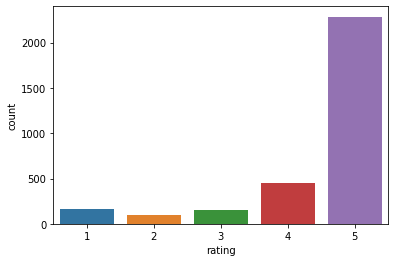

In [80]:
# Use count plot to show how many samples have 1,2,3,4, and 5 ratings
sns.countplot(x = 'rating', data = df)